In [19]:
import kagglehub
import multiprocessing
import torch

# Download latest version
path = kagglehub.dataset_download("lokisilvres/dental-disease-panoramic-detection-dataset")

print("Path to dataset files:", path)

from ultralytics import YOLO

#===== Loading a model =====
pt_file = r"/home/maciej/code/Wikar235/x-ray-disease/temp/trained_model.pt"  # update to your actual path
model = YOLO(pt_file)
model.info()

#===== Prediction =====
test_image = path + "/YOLO/YOLO/test/images/793a4e03-Delshad_sani_Shahla_55yo_28092020_153551_jpg.rf.db86c8463611446aa8f74f238be6e3ab.jpg"
results = model.predict(test_image)


Path to dataset files: /home/maciej/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6
YOLO11n-seg summary: 203 layers, 2,848,653 parameters, 0 gradients, 9.8 GFLOPs

image 1/1 /home/maciej/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/YOLO/YOLO/test/images/793a4e03-Delshad_sani_Shahla_55yo_28092020_153551_jpg.rf.db86c8463611446aa8f74f238be6e3ab.jpg: 416x416 5 Crowns, 5 Fillings, 2 Implants, 1 Missing teeth, 1 Root Canal Treatment, 107.3ms
Speed: 3.6ms preprocess, 107.3ms inference, 17.4ms postprocess per image at shape (1, 3, 416, 416)


In [7]:
boxes = results[0].boxes.xyxy

cls = results[0].boxes.cls
cls

tensor([1., 6., 1., 2., 1., 6., 2., 2., 2., 2., 9., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 9., 1., 2., 2., 1., 9., 6., 9., 2., 1.])

In [1]:
results[0].show()

NameError: name 'results' is not defined

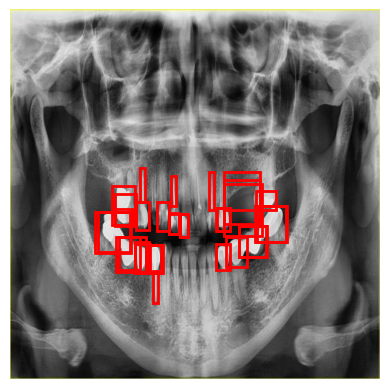

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(test_image)
boxes = results[0].boxes.xyxy.cpu().numpy()  # convert to numpy array

plt.imshow(img)
ax = plt.gca()

for box in boxes:
    x1, y1, x2, y2 = box[:4]
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

plt.axis('off')
plt.show()